In [1]:
import numpy as np
import sys
import os
from scipy import stats
import pandas as pd
import glob as glob
import seaborn as sns
from itertools import combinations 
import matplotlib.pyplot as plt
from scipy.io import loadmat

%matplotlib inline

In [2]:
def grouped_lineplot(df, x, y, hue, plot_marker=False, ymin=0, ymax=1, title=None, outfile=None):
    fig, ax = plt.subplots(figsize=(12.5,7.5))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df,
                       palette="cubehelix", estimator=np.mean, ax=ax)

    sns.despine(ax=ax, left=True)
    ax.set_title(title,fontsize=24)
    ax.set_ylabel(y,fontsize=24)
    ax.set_xlabel('Order',fontsize=24)
    ax.set_ylim(ymin, ymax)
    
    handles,labels = ax.get_legend_handles_labels()
    handles = [handles[1], handles[2], handles[4], handles[3]]
    labels = [labels[1], labels[2], labels[4], labels[3]]
    
    pieman_conds = ['intact', 'paragraph', 'word', 'rest']
    
    if plot_marker:
        for c in pieman_conds:
            p_df = full_data[full_data['Condition']==c]
            max_level = p_df.groupby('Level').mean()[y]
            plt.plot(max_level.argmax(), max_level[max_level.argmax()], marker='o', color='r', markersize=14)

    
    l = ax.legend(handles,labels, loc='center left', bbox_to_anchor=(1.00, .65), ncol=1,fontsize=24)
    l._legend_box.align = "center"
    for line in l.get_lines():
        line.set_linewidth(4.0)
    ax.tick_params(labelsize=24)
    if not outfile:
        fig.show()
    else:
        fig.savefig(outfile, bbox_inches='tight')

In [3]:
def grouped_barplot(df, x, y, hue, ymin=0, ymax=1, title=None, outfile=None):
    fig, ax = plt.subplots(figsize=(12.5,7.5))
    g = sns.factorplot(x=x, y=y, hue=hue, data=df, kind="bar", estimator=np.mean, ci=95, n_boot=1000,
                       palette="cubehelix", ax=ax, order=['intact', 'paragraph', 'word', 'rest'])

    sns.despine(ax=ax, left=True)
    ax.set_title(title, fontsize=24)
    ax.set_ylabel(y, fontsize=24)
    ax.set_xlabel(x, fontsize=24)
    ax.set_ylim(ymin, ymax)

    l = ax.legend(loc='center', bbox_to_anchor=(1, .65), ncol=1, fontsize=24)
    l._legend_box.align = "center"
    l.set_title('Order',prop={'size':24})
    
    ax.tick_params(labelsize=24)
    if not outfile:
        fig.show()
    else:
        fig.savefig(outfile, bbox_inches='tight')

In [4]:
figdir = '../figs'
if not os.path.exists(figdir):
    os.mkdir(figdir)

In [5]:
factors = 700

In [6]:
if factors == 100:
    pieman_name = '../../data/pieman_ica100.mat'
else:
    pieman_name = '../../data/pieman_data.mat'


In [7]:
pieman_name

'../../data/pieman_data.mat'

In [8]:
pieman_data = loadmat(pieman_name)

In [9]:
factor_data_dir = os.path.join(os.getenv('HOME'), 'Desktop', 'timecorr_env', 'timecorr_paper', 'pieman', 'results_' + str(factors))

In [10]:
#factor_data_dir = os.path.join(os.getenv('HOME'), 'Desktop', 'timecorr_env', 'timecorr_paper', 'pieman', 'results')

In [11]:
analysis_name = 'level_analysis_optimized'

In [12]:
data_dir = os.path.join(factor_data_dir, analysis_name)

In [13]:
data_dir

'/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results_700/level_analysis_optimized'

In [14]:
params =glob.glob(os.path.join(data_dir, '*'))

In [15]:
params

['/Users/lucyowen/Desktop/timecorr_env/timecorr_paper/pieman/results_700/level_analysis_optimized/isfc_PCA_gaussian_10']

In [16]:
### Weights:

# for p in params:
#     param_name = os.path.basename(os.path.splitext(p)[0])

#     conds =glob.glob(os.path.join(p, '*.csv'))

#     full_data = pd.DataFrame()
#     for c in conds:
#         data = pd.read_csv(c)
#         data['condition'] = os.path.basename(os.path.splitext(c)[0])

#         if full_data.empty:
#             full_data = data
#         else:
#             full_data = full_data.append(data)

#         melted_df = pd.DataFrame()
#         for c in np.arange(full_data['level'].max() + 2):
#             if c!=full_data['level'].max() + 1:
#                 melted_temp_df = pd.DataFrame()
#                 melted_temp_df['weights'] = full_data['level_' + str(c)]
#                 melted_temp_df['level'] = full_data['level']
#                 melted_temp_df['level'] = c
#                 melted_temp_df['condition'] = full_data['condition']

#                 if melted_df.empty:
#                     melted_df = melted_temp_df
#                 else:
#                     melted_df = melted_df.append(melted_temp_df)
#             else:

#                 melted_temp_df = pd.DataFrame()
#                 melted_temp_df['weights'] = full_data['accuracy']
#                 melted_temp_df['level'] = full_data['level']
#                 #melted_temp_df['level'] = 'accuracy'
#                 melted_temp_df['condition'] = full_data['condition']
#                 melted_df = melted_df.append(melted_temp_df)
#                 full_data['error'] = 1-full_data['error']

#     p_split = param_name.split('_')

#     title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

#     outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '_'+ str(factors)+ '.pdf')
#     grouped_barplot(melted_df, 'condition', 'weights', 'level', ymin=0, ymax=.75, title=title, outfile=outfile)
#     plt.show()
#     plt.close()

In [17]:

for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])

        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)


In [18]:
# pieman_conds = ['intact', 'paragraph', 'word', 'rest']
# new_melt = pd.DataFrame()
# for cond in pieman_conds:
#     p_df = full_data[full_data['condition']==cond]
#     max_level = p_df.groupby('level').mean()['accuracy'].argmax()
#     if cond == 'rest':
#         max_level = 1
#     else:
#         max_level = 2
        
#     p_df = p_df[p_df['level'] == max_level]

#     for c in np.arange(max_level + 1):
#         melted_temp_df = pd.DataFrame()

#         melted_temp_df['Weights'] = p_df['level_' + str(c)]
        
#         if cond != 'rest':
#             melted_temp_df['max_level'] = p_df['level']

#         else:
#             melted_temp_df['max_level'] = p_df['level']
#             melted_temp_df['max_level'] = 2
            
#         melted_temp_df['Level'] = c

#         melted_temp_df['Condition'] = p_df['condition']

#         if new_melt.empty:
#             new_melt = melted_temp_df
#         else:
#             new_melt= new_melt.append(melted_temp_df)
            

# melted_temp_df['Weights'] = 0
# melted_temp_df['Level'] = 2
# new_melt= new_melt.append(melted_temp_df)

# p_split = param_name.split('_')

# title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 

# outfile = os.path.join(figdir, param_name + '_'+ analysis_name + '_'+ str(factors)+ '.pdf')
# grouped_barplot(new_melt, 'Condition', 'Weights', 'Level', ymin=0, ymax=1, title = '', outfile=outfile)
# plt.show()
# plt.close()

/Users/lucyowen/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:22: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


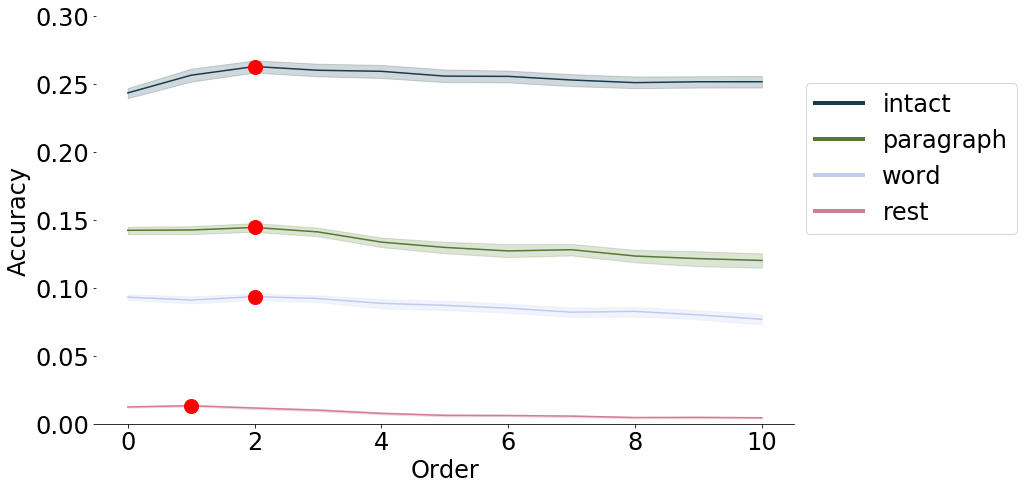

<Figure size 432x288 with 0 Axes>

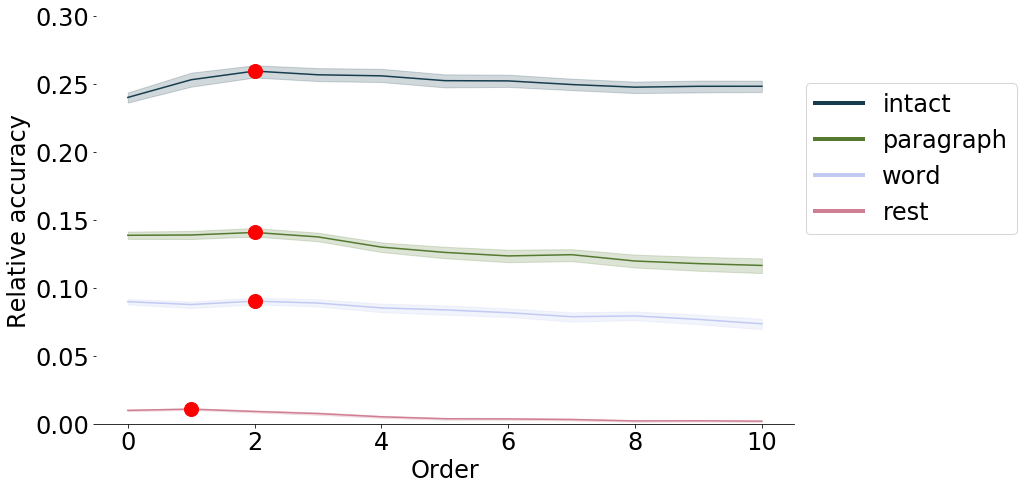

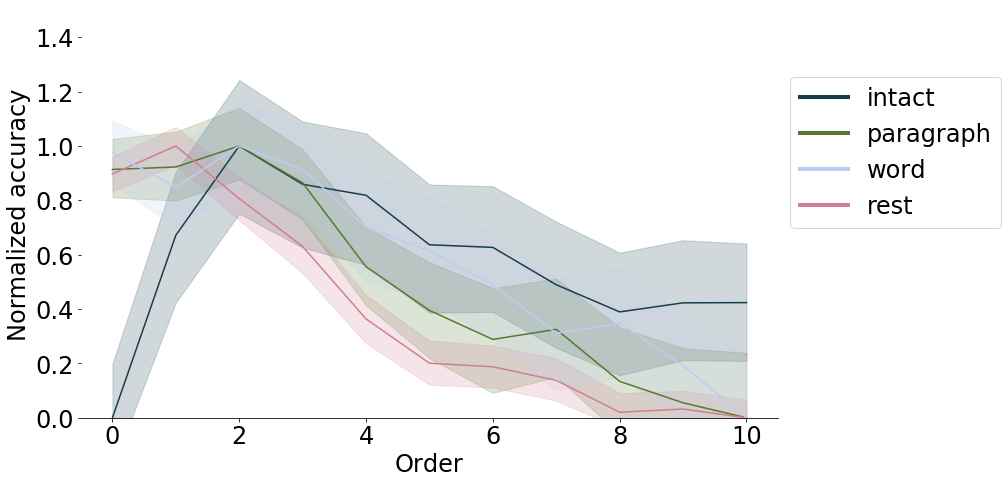

In [19]:

for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        
        cond_name = os.path.basename(os.path.splitext(c)[0])
        chance = 1/300      
        if cond_name == 'paragraph':
            chance = 1/272
        elif cond_name == 'rest':
            chance = 1/400
        
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])
        #data['level'] = 20 - data.isnull().sum(axis=1)
        data['Relative accuracy'] = data['accuracy'] - chance
        data['Normalized accuracy']= data['accuracy'] - np.min(data.groupby('level')['accuracy'].mean())
        data['Normalized accuracy'] = data['Normalized accuracy'] / np.max(data.groupby('level')['Normalized accuracy'].mean())
        
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

    full_data = full_data.rename(index=str, columns={"level": "Level", "accuracy": "Accuracy", "condition": "Condition"})
    
    p_split = param_name.split('_')

    title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] 
    
    outfile = os.path.join(figdir, param_name + '_line_'+ analysis_name + '.pdf')
    grouped_lineplot(full_data, 'Level', 'Accuracy','Condition', plot_marker=True, ymin=0, ymax=.3, title = '', outfile=outfile)
    plt.show()
    plt.close()
    plt.clf()
    
    outfile = os.path.join(figdir, param_name + '_relative_line_'+ analysis_name + '.pdf')
    grouped_lineplot(full_data, 'Level', 'Relative accuracy','Condition', plot_marker=True, title = '', ymin=0, ymax=.3, outfile=outfile)
    plt.show()
    plt.close()
    
    
    outfile = os.path.join(figdir, param_name + '_normalized_line_'+ analysis_name + '.pdf')
    grouped_lineplot(full_data, 'Level', 'Normalized accuracy','Condition', title = '', ymin=0, ymax=1.5, outfile=outfile)
    plt.show()
    plt.close()

In [20]:
#try_data = {'Max Relative Accuracy': max_level[max_level.argmax()], 'Max Level': max_level.argmax(), 'Reduction': p_split[1], 'Kernel': p_split[2], 'Width': p_split[3]}

NameError: name 'max_level' is not defined

In [ ]:
#sum_data = pd.DataFrame(try_data)

In [ ]:
#sum_data = pd.DataFrame({'Max Relative Accuracy': max_level[max_level.argmax()], 'Max Level': max_level.argmax(), 'Reduction': p_split[1], 'Kernel': p_split[2], 'Width': p_split[3]}, index=[0])

In [22]:
all_data = pd.DataFrame()

for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        
        cond_name = os.path.basename(os.path.splitext(c)[0])
        chance = 1/300      
        if cond_name == 'paragraph':
            chance = 1/272
        elif cond_name == 'rest':
            chance = 1/400
        
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])
        data['Relative accuracy'] = data['accuracy'] - chance
        data['Normalized accuracy']= data['accuracy'] - np.min(data.groupby('level')['accuracy'].mean())
        data['Normalized accuracy'] = data['Normalized accuracy'] / np.max(data.groupby('level')['Normalized accuracy'].mean())
        
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)

    full_data = full_data.rename(index=str, columns={"level": "Level", "accuracy": "Accuracy", "condition": "Condition"})
    
    p_df = full_data[full_data['Condition']=='intact']
    max_level = p_df.groupby('Level').mean()['Relative accuracy']
    print(max_level[max_level.argmax()])
    print(max_level.argmax())
    
    p_split = param_name.split('_')

    sum_data = pd.DataFrame({'Max Relative Accuracy': max_level[max_level.argmax()], 'Max Level': max_level.argmax(), 'Reduction': p_split[1], 'Kernel': p_split[2], 'Width': p_split[3]}, index=[0])
    
    if all_data.empty:
        all_data = sum_data
    else:
        all_data = all_data.append(sum_data)

0.2595578231292517
2


/Users/lucyowen/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:33: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
/Users/lucyowen/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:34: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
/Users/lucyowen/Library/Python/3.6/lib/python/site-packages/ipykernel_launcher.py:38: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.


In [ ]:
p_split

In [ ]:
all_data

In [ ]:
pieman_conds = ['intact', 'paragraph', 'word', 'rest']

In [ ]:
comb = combinations(pieman_conds, 2)

In [ ]:
list(comb)

In [ ]:
iter_min = full_data[full_data['Condition'] == 'rest'].shape[0]
pieman_conds = ['intact', 'paragraph', 'word', 'rest']
combs = combinations(pieman_conds, 2)
for c in combs:
    
    t_stat = stats.ttest_rel(full_data[full_data['Condition']==c[0]][:iter_min]['Accuracy'],full_data[full_data['Condition']==c[1]][:iter_min]['Accuracy'], nan_policy='omit')
    
    print(c[0], c[1], t_stat)


In [ ]:
#max_level = p_df.groupby('Level').mean()['Accuracy']

In [ ]:
p_df = full_data[full_data['Condition']=='intact']
max_level = p_df.groupby('Level').mean()['Accuracy']

In [ ]:
max_level[max_level.argmax()]

In [ ]:
max_level.argmax()

In [ ]:
pieman_conds = ['intact', 'paragraph', 'word', 'rest']
for c in pieman_conds:
    for l in np.arange(11):
        p_df = full_data[full_data['Condition']==c]
        max_level = p_df.groupby('Level').mean()['Accuracy'].argmax()
        t_stat = stats.ttest_rel(p_df[p_df['Level']==0]['Accuracy'],p_df[p_df['Level']==l]['Accuracy'], nan_policy='omit')
        print('Condition: ' + c + ' max level: ' + str(l), t_stat)

In [ ]:
analysis_name = 'level_analysis_chunked'

In [ ]:
data_dir = os.path.join(factor_data_dir, analysis_name)

In [ ]:
params = glob.glob(os.path.join(data_dir, '*'))

In [ ]:
params

In [ ]:
full_data

In [23]:
for p in params:
    param_name = os.path.basename(os.path.splitext(p)[0])

    conds =glob.glob(os.path.join(p, '*.csv'))

    full_data = pd.DataFrame()
    for c in conds:
        data = pd.read_csv(c)
        data['condition'] = os.path.basename(os.path.splitext(c)[0])
        
        if full_data.empty:
            full_data = data
        else:
            full_data = full_data.append(data)
            
    full_data = full_data.rename(index=str, columns={"level": "Level", "accuracy": "Accuracy", "condition": "Condition", "third":"Third"})

    
    for t in range(2):
        
        full_data_third = full_data[full_data['Third'] == t]

        full_data_third['Relative accuracy'] = full_data_third['Accuracy'] - chance
        full_data_third['Normalized accuracy']= full_data_third['Accuracy'] - np.min(full_data_third.groupby('Level')['Accuracy'].mean())
        full_data_third['Normalized accuracy'] = full_data_third['Normalized accuracy'] / np.max(full_data_third.groupby('Level')['Normalized accuracy'].mean())
        
        p_split = param_name.split('_')

        title = p_split[0] + ' ' + p_split[1] + ' ' + p_split[-2] + ' ' + p_split[-1] + ' third: ' + str(t)


        outfile = os.path.join(figdir, param_name + '_'+ str(t) + '_accuracy.pdf')
        grouped_lineplot(full_data_third, 'Level','Accuracy', 'Condition', ymin=0, ymax=.35, title=title, outfile=outfile)
        plt.show()
        plt.close()
        
        outfile = os.path.join(figdir, param_name + '_normalized_line_'+ analysis_name + '.pdf')
        grouped_lineplot(full_data_third, 'Level', 'Normalized accuracy','Condition', title = '', ymin=0, ymax=1.5, outfile=outfile)
        plt.show()
        plt.close()
        
        

KeyError: 'Third'